## Import Dependencies

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import gym
from gym import spaces
import networkx as nx
import numpy as np
from stable_baselines3 import PPO
import random
from stable_baselines3.common.env_checker import check_env
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Categorical

In [1]:
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name())
print(torch.cuda.memory_allocated())

True
0
NVIDIA GeForce RTX 3050 Laptop GPU
0


## Create a graph network

In [3]:
def create_real_time_graph():
    """
    Creates a real-time graph network with 20 nodes representing locations
    and edges with weights representing distances in kilometers.

    Returns:
        G (networkx.Graph): A graph object with nodes and weighted edges.
    """
    G = nx.Graph()

    # Add nodes
    locations = {i: f"{i+1}" for i in range(20)}
    G.add_nodes_from(locations.keys())

    # Define edges with distances (weights)
    edges = [
        (0, 1, 5), (0, 2, 10), (1, 3, 7), (2, 3, 6),
        (2, 4, 15), (3, 5, 9), (4, 5, 4), (4, 6, 8),
        (5, 7, 3), (6, 8, 12), (7, 9, 6), (8, 9, 5),
        (8, 10, 14), (9, 11, 7), (10, 12, 11), (11, 13, 9),
        (12, 14, 13), (13, 15, 10), (14, 16, 6), (15, 17, 12),
        (16, 18, 8), (17, 19, 9), (18, 19, 5)
    ]

    # Add edges to the graph
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    return G, locations

In [4]:
def plot_graph(G, locations):
    """
    Plots the given graph with enhanced visualization and sufficient spacing.

    Args:
        G (networkx.Graph): The graph object to be visualized.
        locations (dict): A dictionary mapping node IDs to location names.
    """
    # Generate positions for the nodes with increased spacing (k=2.5)
    pos = nx.spring_layout(G, seed=42, k=4)

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos, node_size=800, node_color="lightblue", edgecolors="black")

    # Draw the edges
    nx.draw_networkx_edges(G, pos, width=1.5, edge_color="gray", alpha=0.7)

    # Add labels for nodes
    nx.draw_networkx_labels(G, pos, labels=locations, font_size=10, font_color="black")

    # Add edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v} km" for k, v in edge_labels.items()},
                                 font_size=8, font_color="black")

    # Add title and improve layout
    plt.title("Real-Time Road Network with 20 Nodes", fontsize=16, fontweight="bold")
    plt.axis("off")  # Turn off axis
    plt.tight_layout()
    plt.show()

In [5]:
def print_all_paths(graph, start, goal):
    """
    Prints all possible paths between the start and goal nodes in the graph.

    Args:
        graph (networkx.Graph): The graph object.
        start (int): The starting node.
        goal (int): The target node.
    """
    # Find all simple paths
    paths = list(nx.all_simple_paths(graph, source=start, target=goal))
    print(f"All possible paths from {start} to {goal}:")
    for i, path in enumerate(paths, start=1):
        print(f"Path {i}: {' -> '.join(map(str, path))}")


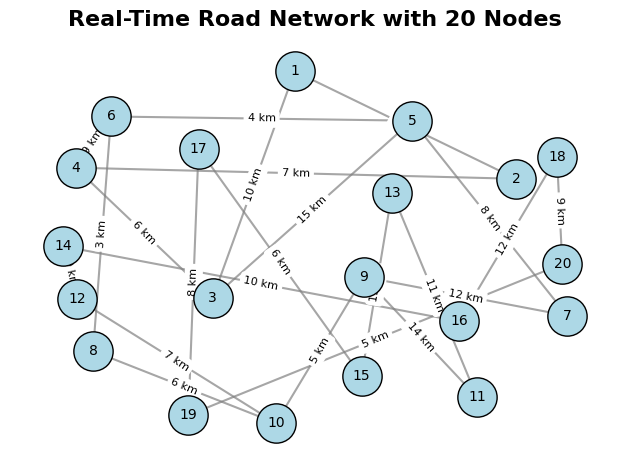

In [6]:
# Create the graph and plot it
graph, location_labels = create_real_time_graph()
plot_graph(graph, location_labels)


In [7]:
print_all_paths(graph, start=0, goal=17)

All possible paths from 0 to 17:
Path 1: 0 -> 1 -> 3 -> 2 -> 4 -> 5 -> 7 -> 9 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 2: 0 -> 1 -> 3 -> 2 -> 4 -> 5 -> 7 -> 9 -> 11 -> 13 -> 15 -> 17
Path 3: 0 -> 1 -> 3 -> 2 -> 4 -> 6 -> 8 -> 9 -> 11 -> 13 -> 15 -> 17
Path 4: 0 -> 1 -> 3 -> 2 -> 4 -> 6 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 5: 0 -> 1 -> 3 -> 5 -> 4 -> 6 -> 8 -> 9 -> 11 -> 13 -> 15 -> 17
Path 6: 0 -> 1 -> 3 -> 5 -> 4 -> 6 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 7: 0 -> 1 -> 3 -> 5 -> 7 -> 9 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 8: 0 -> 1 -> 3 -> 5 -> 7 -> 9 -> 11 -> 13 -> 15 -> 17
Path 9: 0 -> 2 -> 3 -> 5 -> 4 -> 6 -> 8 -> 9 -> 11 -> 13 -> 15 -> 17
Path 10: 0 -> 2 -> 3 -> 5 -> 4 -> 6 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 11: 0 -> 2 -> 3 -> 5 -> 7 -> 9 -> 8 -> 10 -> 12 -> 14 -> 16 -> 18 -> 19 -> 17
Path 12: 0 -> 2 -> 3 -> 5 -> 7 -> 9 -> 11 -> 13 -> 15 -> 17
Path 13: 0 -> 2 -> 4 -> 5 -> 7 -> 9 -> 8 -> 10 -> 12 -> 14 -> 16 -> 

## Create graph network with random nodes and edges with chaging stations at random locations

Edges with weights:
1 - 2: 14.52
1 - 12: 17.38
1 - 20: 13.52
2 - 14: 17.8
2 - 12: 10.08
3 - 8: 9.14
3 - 4: 4.01
3 - 15: 6.04
4 - 11: 13.17
4 - 15: 18.79
5 - 6: 2.08
6 - 17: 4.8
7 - 8: 13.11
8 - 11: 15.0
9 - 14: 8.61
10 - 14: 12.85
10 - 18: 6.21
11 - 20: 18.93
12 - 18: 11.06
13 - 19: 6.85
15 - 17: 19.29
16 - 17: 9.31

Nodes with 'charging_station' attribute:
Node 1: No Charging Station
Node 2: Charging Station
Node 3: No Charging Station
Node 4: No Charging Station
Node 5: No Charging Station
Node 6: No Charging Station
Node 7: No Charging Station
Node 8: No Charging Station
Node 9: No Charging Station
Node 10: No Charging Station
Node 11: No Charging Station
Node 12: No Charging Station
Node 13: Charging Station
Node 14: Charging Station
Node 15: Charging Station
Node 16: No Charging Station
Node 17: No Charging Station
Node 18: No Charging Station
Node 19: Charging Station
Node 20: No Charging Station


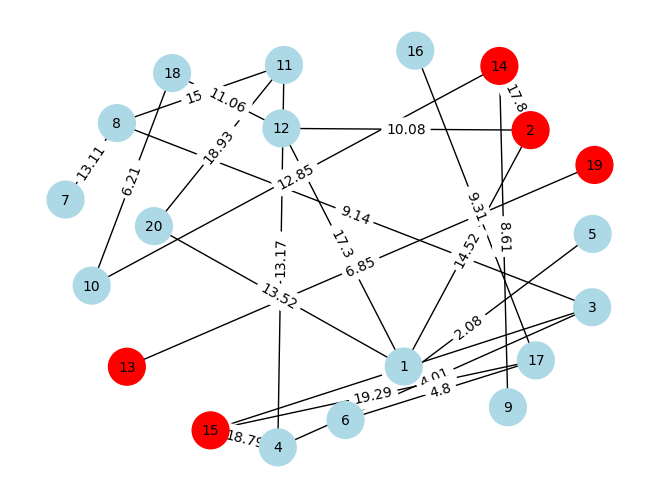

In [8]:
def create_random_graph_with_constraints(num_nodes):
    """
    Create a random graph with the constraint that each node has at most 3 connections
    and randomly assign a 'charging_station' attribute to at least 5 nodes.
    
    Args:
        num_nodes (int): The number of nodes in the graph.
    
    Returns:
        G: A NetworkX graph object.
    """
    G = nx.Graph()  # Create an empty undirected graph

    # Add nodes to the graph (starting from 1 instead of 0)
    for i in range(1, num_nodes + 1):
        G.add_node(i)

    # Add edges with random weights ensuring each node has at most 3 connections
    while True:
        node1 = random.randint(1, num_nodes)
        node2 = random.randint(1, num_nodes)

        if node1 != node2 and G.degree[node1] < 3 and G.degree[node2] < 3:
            if not G.has_edge(node1, node2):  # Ensure no duplicate edges
                weight = round(random.uniform(1, 20), 2)  # Random weight between 1 and 20
                G.add_edge(node1, node2, weight=weight)

        # Stop when all nodes have at least one connection and at most 3 connections
        if all(1 <= G.degree[node] <= 3 for node in G.nodes):
            break

    # Randomly assign 'charging_station' attribute to at least 5 nodes
    charging_stations = random.sample(list(G.nodes), 5)  # Convert G.nodes to a list
    for node in G.nodes:
        G.nodes[node]['charging_station'] = node in charging_stations

    return G

# Generate a random graph with 20 nodes
num_nodes = 20
G = create_random_graph_with_constraints(num_nodes)

# Print the edges with weights
print("Edges with weights:")
for u, v, weight in G.edges(data="weight"):
    print(f"{u} - {v}: {weight}")

# Print nodes with charging station attribute
print("\nNodes with 'charging_station' attribute:")
for node, data in G.nodes(data=True):
    print(f"Node {node}: {'Charging Station' if data['charging_station'] else 'No Charging Station'}")

# Draw the graph with edge weights
k_value = 5  
pos = nx.spring_layout(G, k=k_value)  # Position nodes using a spring layout
node_colors = ["red" if G.nodes[node]['charging_station'] else "lightblue" for node in G.nodes]

nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=700, font_size=10)
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

## Create graph network with charging stations at selected locations

In [14]:
def create_real_time_graph_with_charging_stations():
    """
    Creates a real-time graph network with 20 nodes (starting from 1) representing locations,
    edges with weights representing distances in kilometers, and charging stations at specific nodes.

    Returns:
        G (networkx.Graph): A graph object with nodes and weighted edges.
        locations (dict): A dictionary mapping node IDs to location names.
    """
    G = nx.Graph()

    # Add nodes starting from 0
    locations = {i: f"{i}" for i in range(20)}  # Nodes are 0 to 19
    G.add_nodes_from(locations.keys())

    # Define charging stations
    charging_stations = {2, 4, 6, 8, 10, 12}  # Adjusted for 0-indexing

    # Add a 'charging_station' attribute to each node
    for node in G.nodes:
        G.nodes[node]['charging_station'] = node in charging_stations

    # Define edges with distances (weights), adjusted for 0-indexing
    edges = [
        (0, 1, 5), (0, 2, 10), (1, 3, 7), (2, 3, 6),
        (2, 4, 15), (3, 5, 9), (4, 5, 4), (4, 6, 8),
        (5, 7, 3), (6, 8, 12), (7, 9, 6), (8, 9, 5),
        (8, 10, 14), (9, 11, 7), (10, 12, 11), (11, 13, 9),
        (12, 14, 13), (13, 15, 10), (14, 16, 6), (15, 17, 12),
        (16, 18, 8), (17, 19, 9), (18, 19, 5)
    ]

    # Add edges to the graph
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    return G, locations


In [15]:
def plot_graph_with_charging_stations(G, locations):
    """
    Plots the given graph with enhanced visualization, charging station markers, and sufficient spacing.

    Args:
        G (networkx.Graph): The graph object to be visualized.
        locations (dict): A dictionary mapping node IDs to location names.
    """
    # Generate positions for the nodes with increased spacing (k=4)
    pos = nx.spring_layout(G, seed=42, k=4)

    # Separate nodes into two categories: with and without charging stations
    charging_nodes = [node for node, data in G.nodes(data=True) if data['charging_station']]
    non_charging_nodes = [node for node in G.nodes if node not in charging_nodes]

    # Draw the nodes without charging stations
    nx.draw_networkx_nodes(G, pos, nodelist=non_charging_nodes, node_size=800, 
                           node_color="lightblue", edgecolors="black")

    # Draw the nodes with charging stations
    nx.draw_networkx_nodes(G, pos, nodelist=charging_nodes, node_size=800, 
                           node_color="red", edgecolors="black", label="Charging Station")

    # Draw the edges
    nx.draw_networkx_edges(G, pos, width=1.5, edge_color="gray", alpha=0.7)

    # Add labels for nodes
    nx.draw_networkx_labels(G, pos, labels=locations, font_size=10, font_color="black")

    # Add edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v} km" for k, v in edge_labels.items()},
                                 font_size=8, font_color="darkgreen")

    # Add title, legend, and improve layout
    plt.title("Real-Time Road Network with Charging Stations", fontsize=16, fontweight="bold")
    plt.legend(scatterpoints=1, loc="upper left", markerscale=0.7)
    plt.axis("off")  # Turn off axis
    plt.tight_layout()
    plt.show()    

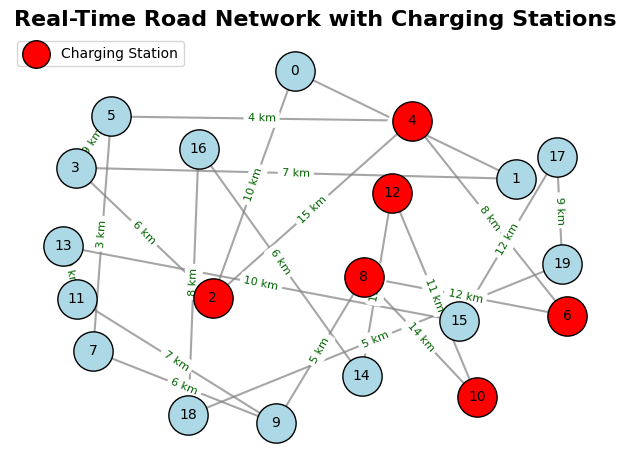

All possible paths from 1 to 16:
Path 1: 1 -> 0 -> 2 -> 3 -> 5 -> 4 -> 6 -> 8 -> 9 -> 11 -> 13 -> 15 -> 17 -> 19 -> 18 -> 16
Path 2: 1 -> 0 -> 2 -> 3 -> 5 -> 4 -> 6 -> 8 -> 10 -> 12 -> 14 -> 16
Path 3: 1 -> 0 -> 2 -> 3 -> 5 -> 7 -> 9 -> 8 -> 10 -> 12 -> 14 -> 16
Path 4: 1 -> 0 -> 2 -> 3 -> 5 -> 7 -> 9 -> 11 -> 13 -> 15 -> 17 -> 19 -> 18 -> 16
Path 5: 1 -> 0 -> 2 -> 4 -> 5 -> 7 -> 9 -> 8 -> 10 -> 12 -> 14 -> 16
Path 6: 1 -> 0 -> 2 -> 4 -> 5 -> 7 -> 9 -> 11 -> 13 -> 15 -> 17 -> 19 -> 18 -> 16
Path 7: 1 -> 0 -> 2 -> 4 -> 6 -> 8 -> 9 -> 11 -> 13 -> 15 -> 17 -> 19 -> 18 -> 16
Path 8: 1 -> 0 -> 2 -> 4 -> 6 -> 8 -> 10 -> 12 -> 14 -> 16
Path 9: 1 -> 3 -> 2 -> 4 -> 5 -> 7 -> 9 -> 8 -> 10 -> 12 -> 14 -> 16
Path 10: 1 -> 3 -> 2 -> 4 -> 5 -> 7 -> 9 -> 11 -> 13 -> 15 -> 17 -> 19 -> 18 -> 16
Path 11: 1 -> 3 -> 2 -> 4 -> 6 -> 8 -> 9 -> 11 -> 13 -> 15 -> 17 -> 19 -> 18 -> 16
Path 12: 1 -> 3 -> 2 -> 4 -> 6 -> 8 -> 10 -> 12 -> 14 -> 16
Path 13: 1 -> 3 -> 5 -> 4 -> 6 -> 8 -> 9 -> 11 -> 13 -> 15 -> 17 -> 

In [22]:
# Create the graph with charging stations and plot it
graph_cs, location_labels_cs = create_real_time_graph_with_charging_stations()
plot_graph_with_charging_stations(graph_cs, location_labels_cs)
print_all_paths(graph_cs, start=1, goal=16)

## Basic RL Algorithm

In [24]:
# Define the Policy Network
class PolicyNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(PolicyNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        return self.fc(x)

In [25]:
# Define a custom environment for graph navigation
class GraphEnvironment:
    def __init__(self, graph, start_node, target_node):
        self.graph = graph
        self.start_node = start_node
        self.target_node = target_node
        self.current_node = start_node

    def reset(self):
        self.current_node = self.start_node
        return self.current_node

    def step(self, action):
        # Action corresponds to moving to a neighboring node
        next_node = action
        reward = -self.graph[self.current_node][next_node]["weight"]
        self.current_node = next_node

        # Check if target node is reached
        done = self.current_node == self.target_node
        return self.current_node, reward, done

In [26]:
# Function to compute discounted rewards
def compute_discounted_rewards(rewards, gamma=0.99):
    discounted_rewards = []
    R = 0
    for r in reversed(rewards):
        R = r + gamma * R
        discounted_rewards.insert(0, R)
    discounted_rewards = torch.tensor(discounted_rewards, dtype=torch.float32)
    return (discounted_rewards - discounted_rewards.mean()) / (discounted_rewards.std() + 1e-9)

In [27]:
def train(env, policy, optimizer, episodes=2, gamma=0.99):
    episode_rewards = []

    for episode in range(episodes):
        state = env.reset()
        rewards = []
        log_probs = []
        done = False

        while not done:
            
            # Convert state to tensor
            state_tensor = torch.tensor([state], dtype=torch.float32)
        
            # Get action probabilities for all nodes
            all_probs = policy(state_tensor).squeeze()
        
            # Filter probabilities to include only neighbors
            neighbors = list(env.graph.neighbors(state))
            neighbor_probs = all_probs[neighbors]
            neighbor_probs /= neighbor_probs.sum()  # Normalize to ensure valid probabilities
        
            # Create a categorical distribution over neighbors
            m = Categorical(neighbor_probs)
            action_index = m.sample()
            action = neighbors[action_index.item()]  # Map sampled index back to neighbor
        
            # Step in the environment
            next_state, reward, done = env.step(action)
        
            # Log probabilities and rewards
            log_probs.append(m.log_prob(action_index))
            rewards.append(reward)
        
            state = next_state

            if done:
                # Compute discounted rewards
                episode_rewards.append(sum(rewards))
                discounted_rewards = compute_discounted_rewards(rewards, gamma)

                # Compute policy loss
                policy_loss = []
                for log_prob, Gt in zip(log_probs, discounted_rewards):
                    policy_loss.append(-log_prob * Gt)
                policy_loss = torch.stack(policy_loss).sum()


                # Backpropagation
                optimizer.zero_grad()
                policy_loss.backward()
                optimizer.step()

                
                if episode % 1 == 0:
                    print(f"Episode {episode}, Total Reward: {sum(rewards)}")
                break

    # Print overall performance
    print(f"Training complete. Average reward: {sum(episode_rewards) / episodes}")

# Main program
if __name__ == "__main__":
    # Use the graph with charging stations
    graph, location_labels = create_real_time_graph_with_charging_stations()
    start_node = 1 
    target_node = max(graph.nodes)  

    # Initialize the environment
    env = GraphEnvironment(graph, start_node, target_node)

    # Initialize the policy network
    input_size = 1  
    hidden_size = 128
    output_size = len(graph.nodes)  
    policy = PolicyNetwork(input_size, hidden_size, output_size)

    # Define optimizer
    optimizer = optim.Adam(policy.parameters(), lr=1e-2)

    # Train the policy
    train(env, policy, optimizer)


Episode 0, Total Reward: -2595014


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 1 bytes.